<a href="https://colab.research.google.com/github/rafayel404/Pandas/blob/main/Pandas_6_Multi_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [2]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# The problem?
a['cse']

KeyError: 'cse'

In [4]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [6]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]


Index([2019, 2020, 2021, 2022], dtype='int64')

In [7]:
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]]) # pass 2d list
# level inside multiindex object

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [9]:
# how to fetch items from such a series
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [10]:
s[('cse',2020)]

np.int64(2)

In [11]:
# How many info do i need to provide to fetch data = How many dimention
# s is 2D

In [12]:
# unstack - converts series into dataframe
temp = s.unstack()
temp

2019  2020  2021  2022
cse     1     2     3     4
ece     5     6     7     8

In [13]:
# stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# Then what was the point of multiindex series?
# We can reduce dimention of data using multi indexing

In [14]:
# multiindex dataframe

In [15]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [16]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [17]:
# Are columns really different from index?
# Index and column are same thing

In [18]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [19]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [20]:
branch_df2['delhi']

avg_package  students
2019            1         2
2020            3         4
2021            5         6
2022            7         8

In [21]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and Unstacking

In [22]:
branch_df1.unstack() # vitorer index column hoye jabe

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [24]:
k=branch_df1.unstack().unstack()
k

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [25]:
k.shape

(16,)

In [28]:
type(k)

pandas.core.series.Series

In [32]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [30]:
branch_df1.unstack().stack() # vitorer column ta row hoye jabe

<ipython-input-30-7acc326989c1>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack()


avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [37]:
branch_df1.unstack().stack().stack()

<ipython-input-37-936ee70d75f7>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [34]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [38]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [39]:
branch_df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
dtype: int64

In [40]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [41]:
branch_df3.stack()

<ipython-input-41-b29b2da6fd0c>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack()


delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [42]:
branch_df3.stack().stack()

<ipython-input-42-79e1a305373c>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
                        mumbai     0
     2022  avg_package  delhi     15
                        mumbai     0
           students     delhi     16
                        mumbai     0
dtype: int64

In [43]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [45]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [44]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [46]:
branch_df3.loc[('cse',2019):('ece',2020)]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0

In [47]:
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [48]:
branch_df3.iloc[0:6:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [49]:
# Extracting cols
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [50]:

branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [52]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [53]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

delhi      mumbai
         students avg_package
cse 2019        2           0
ece 2019       10           0

In [54]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [56]:
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [57]:
branch_df3.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [58]:
branch_df3.sort_index(level=1,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [59]:
branch_df3.sort_index(level=0,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [60]:
branch_df3.T

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [61]:
# swaplevel
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [62]:
# swaplevel
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
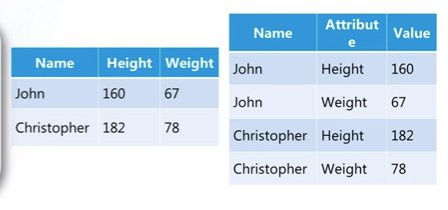

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [63]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]})

cse
0  120

In [64]:
pd.DataFrame({'cse':[120]}).melt()

variable  value
0      cse    120

In [65]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]})

cse  ece  mech
0  120  100    50

In [66]:

pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

branch  num_students
0    cse           120
1    ece           100
2   mech            50

In [67]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

branch  2020  2021  2022
0    cse   100   120   150
1    ece   150   130   140
2   mech    60    80    70

In [68]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

branch  year  students
0    cse  2020       100
1    ece  2020       150
2   mech  2020        60
3    cse  2021       120
4    ece  2021       130
5   mech  2021        80
6    cse  2022       150
7    ece  2022       140
8   mech  2022        70

In [69]:
# melt -> real world example
death = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [70]:
death.sample(5)

Province/State  Country/Region        Lat       Long  \
120                French Guiana          France   3.933900 -53.125800   
205                          NaN           Niger  17.607789   8.081666   
269  Falkland Islands (Malvinas)  United Kingdom -51.796300 -59.523600   
88                         Tibet           China  31.692700  88.092400   
81                       Qinghai           China  35.745200  95.995600   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  12/24/22  \
120        0        0        0        0        0        0  ...       411   
205        0        0        0        0        0        0  ...       314   
269        0        0        0        0        0        0  ...         0   
88         0        0        0        0        0        0  ...         0   
81         0        0        0        0        0        0  ...         0   

     12/25/22  12/26/22  12/27/22  12/28/22  12/29/22  12/30/22  12/31/22  \
120       411       411       411       411       411       411       411   
205       314       314       314       314       314       314       314   
269         0         0         0         0         0         0         0   
88          0         0         0         0         0         0         0   
81          0         0         0         0         0         0         0   

     1/1/23  1/2/23  
120     411     411  
205     314     314  
269       0       0  
88        0       0  
81        0       0  

[5 rows x 1081 columns]

In [71]:
death.shape

(289, 1081)

In [72]:
confirm.sample(5)

Province/State   Country/Region        Lat        Long  1/22/20  1/23/20  \
30             NaN         Botswana -22.328500   24.684900        0        0   
272    Isle of Man   United Kingdom  54.236100   -4.548100        0        0   
178            NaN         Malaysia   4.210484  101.975766        0        0   
237            NaN  Solomon Islands  -9.645700  160.156200        0        0   
114            NaN          Eritrea  15.179400   39.782300        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  12/24/22  12/25/22  12/26/22  \
30         0        0        0        0  ...    327511    327511    327511   
272        0        0        0        0  ...     38008     38008     38008   
178        0        4        4        4  ...   5022910   5023519   5023999   
237        0        0        0        0  ...     24575     24575     24575   
114        0        0        0        0  ...     10189     10189     10189   

     12/27/22  12/28/22  12/29/22  12/30/22  12/31/22   1/1/23   1/2/23  
30     327511    327511    327511    327860    327860   327860   327860  
272     38008     38008     38008     38008     38008    38008    38008  
178   5024422   5024902   5025581   5026164   5026677  5027097  5027457  
237     24575     24575     24575     24575     24575    24575    24575  
114     10189     10189     10189     10189     10189    10189    10189  

[5 rows x 1081 columns]

In [74]:
confirm.shape

(289, 1081)

In [75]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [76]:
death

Province/State        Country/Region        Lat        Long     date  \
0                 NaN           Afghanistan  33.939110   67.709953  1/22/20   
1                 NaN               Albania  41.153300   20.168300  1/22/20   
2                 NaN               Algeria  28.033900    1.659600  1/22/20   
3                 NaN               Andorra  42.506300    1.521800  1/22/20   
4                 NaN                Angola -11.202700   17.873900  1/22/20   
...               ...                   ...        ...         ...      ...   
311248            NaN    West Bank and Gaza  31.952200   35.233200   1/2/23   
311249            NaN  Winter Olympics 2022  39.904200  116.407400   1/2/23   
311250            NaN                 Yemen  15.552727   48.516388   1/2/23   
311251            NaN                Zambia -13.133897   27.849332   1/2/23   
311252            NaN              Zimbabwe -19.015438   29.154857   1/2/23   

        num_deaths  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
311248        5708  
311249           0  
311250        2159  
311251        4024  
311252        5637  

[311253 rows x 6 columns]

In [77]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

Country/Region     date  num_cases  num_deaths
0                Afghanistan  1/22/20          0           0
1                    Albania  1/22/20          0           0
2                    Algeria  1/22/20          0           0
3                    Andorra  1/22/20          0           0
4                     Angola  1/22/20          0           0
...                      ...      ...        ...         ...
311248    West Bank and Gaza   1/2/23     703228        5708
311249  Winter Olympics 2022   1/2/23        535           0
311250                 Yemen   1/2/23      11945        2159
311251                Zambia   1/2/23     334661        4024
311252              Zimbabwe   1/2/23     259981        5637

[311253 rows x 4 columns]

### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
df = sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [90]:
df.groupby('sex',observed=False)[['total_bill']].mean()

total_bill
sex               
Male     20.744076
Female   18.056897

In [89]:
df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [91]:
df.groupby(['sex','smoker'],observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [94]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=False)

smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [95]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

<ipython-input-95-a6ac4ce3d29d>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker       Yes        No
sex                       
Male    9.911845  8.726566
Female  9.189751  7.286455

In [101]:
# all cols together
df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip'],observed=False)

tip           total_bill           
smoker       Yes        No        Yes         No
sex                                             
Male    3.051167  3.113402  22.284500  19.791237
Female  2.931515  2.773519  17.977879  18.105185

In [102]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

<ipython-input-102-a6ac4ce3d29d>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker       Yes        No
sex                       
Male    9.911845  8.726566
Female  9.189751  7.286455

In [103]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

<ipython-input-103-37c182132966>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [104]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

<ipython-input-104-c8bedb116dce>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker      Yes       No      All
sex                              
Male    1337.07  1919.75  3256.82
Female   593.27   977.68  1570.95
All     1930.34  2897.43  4827.77

In [105]:
# plotting graphs
df = pd.read_csv('/content/expense_data.csv')

In [106]:
df

Date               Account        Category  Subcategory  \
0      3/2/2022 10:11  CUB - online payment            Food          NaN   
1      3/2/2022 10:11  CUB - online payment           Other          NaN   
2      3/1/2022 19:50  CUB - online payment            Food          NaN   
3      3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4      3/1/2022 18:22  CUB - online payment            Food          NaN   
..                ...                   ...             ...          ...   
272  11/22/2021 14:16  CUB - online payment            Food          NaN   
273  11/22/2021 14:16  CUB - online payment            Food          NaN   
274  11/21/2021 17:07  CUB - online payment  Transportation          NaN   
275  11/21/2021 15:50  CUB - online payment            Food          NaN   
276  11/21/2021 13:30  CUB - online payment           Other          NaN   

                   Note     INR Income/Expense  Note.1  Amount Currency  \
0               Brownie    50.0        Expense     NaN    50.0      INR   
1      To lended people   300.0        Expense     NaN   300.0      INR   
2                Dinner    78.0        Expense     NaN    78.0      INR   
3                 Metro    30.0        Expense     NaN    30.0      INR   
4                Snacks    67.0        Expense     NaN    67.0      INR   
..                  ...     ...            ...     ...     ...      ...   
272              Dinner    90.0        Expense     NaN    90.0      INR   
273  Lunch with company    97.0        Expense     NaN    97.0      INR   
274              Rapido   130.0        Expense     NaN   130.0      INR   
275               Lunch   875.0        Expense     NaN   875.0      INR   
276       Got from gobi  2000.0         Income     NaN  2000.0      INR   

     Account.1  
0         50.0  
1        300.0  
2         78.0  
3         30.0  
4         67.0  
..         ...  
272       90.0  
273       97.0  
274      130.0  
275      875.0  
276     2000.0  

[277 rows x 11 columns]

In [107]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [109]:
df['Date'] = pd.to_datetime(df['Date'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [111]:
df['month'] = df['Date'].dt.month_name()

In [112]:
df.head()

Date               Account        Category  Subcategory  \
0 2022-03-02 10:11:00  CUB - online payment            Food          NaN   
1 2022-03-02 10:11:00  CUB - online payment           Other          NaN   
2 2022-03-01 19:50:00  CUB - online payment            Food          NaN   
3 2022-03-01 18:56:00  CUB - online payment  Transportation          NaN   
4 2022-03-01 18:22:00  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  \
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0   
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0   
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0   
3             Metro   30.0        Expense     NaN    30.0      INR       30.0   
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0   

   month  
0  March  
1  March  
2  March  
3  March  
4  March

<Axes: xlabel='month'>

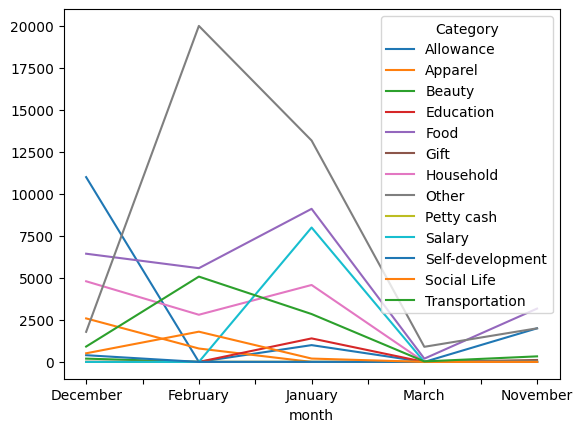

In [113]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

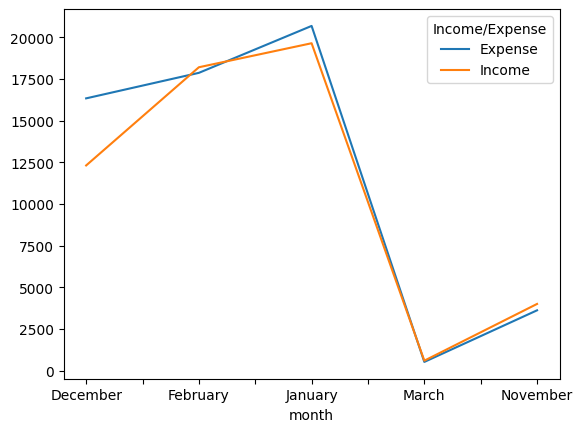

In [114]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

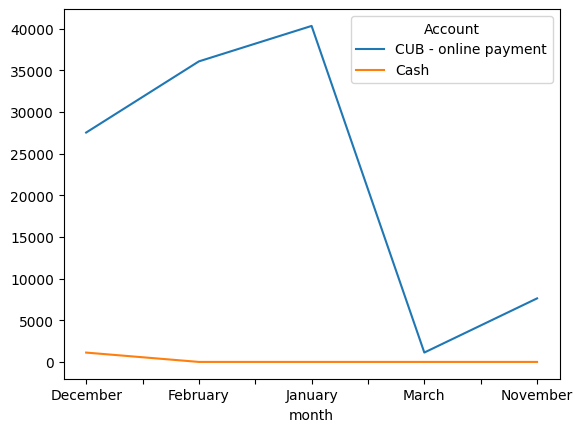

In [115]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()